 #                                         Speech-To-Text

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrogram

#### In below blog they tried with sample of wave file 
        https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

#### Lets try with other feature like spectrogram
        Data : https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [2]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [3]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [6]:
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
from shutil import copy2 as cp

In [7]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [10]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-7-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([14, 23, 19, ..., 19, 22, 24], dtype=int16), 16000)

In [45]:
def graph_spectrogram(wavname):
    sound_info, frame_rate = get_wav_info(wavname)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['savefig.facecolor'] = 'black'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['lines.color'] = 'white'
    plt.rcParams['text.color'] = 'white'    
    plt.rcParams['xtick.color'] = 'white'    
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    fig = plt.figure(num=None, figsize=(12, 7.5), dpi=90)
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
    ax.tick_params(axis='both', direction='inout')
    plt.title('Spectrogram')
    plt.xlabel('time in seconds')
    plt.ylabel('Frequency (Khz)')
    plt.specgram(sound_info, Fs=frame_rate, cmap='gnuplot')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('dB')
    

<ipython-input-7-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


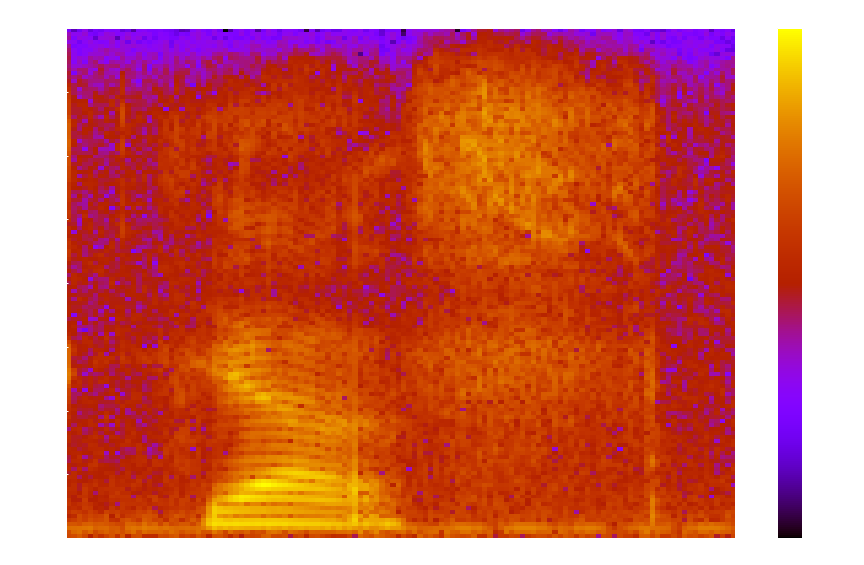

In [48]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-20-335fa980a1ff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


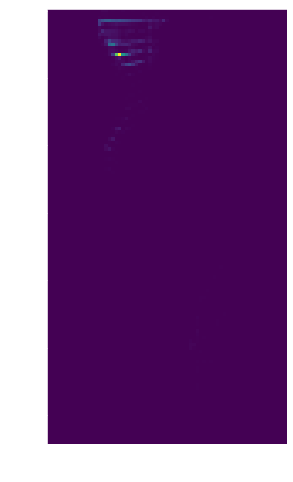

In [20]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [5]:
samples

array([14, 23, 19, ..., 19, 22, 24], dtype=int16)

<ipython-input-75-aee4b22a3610>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


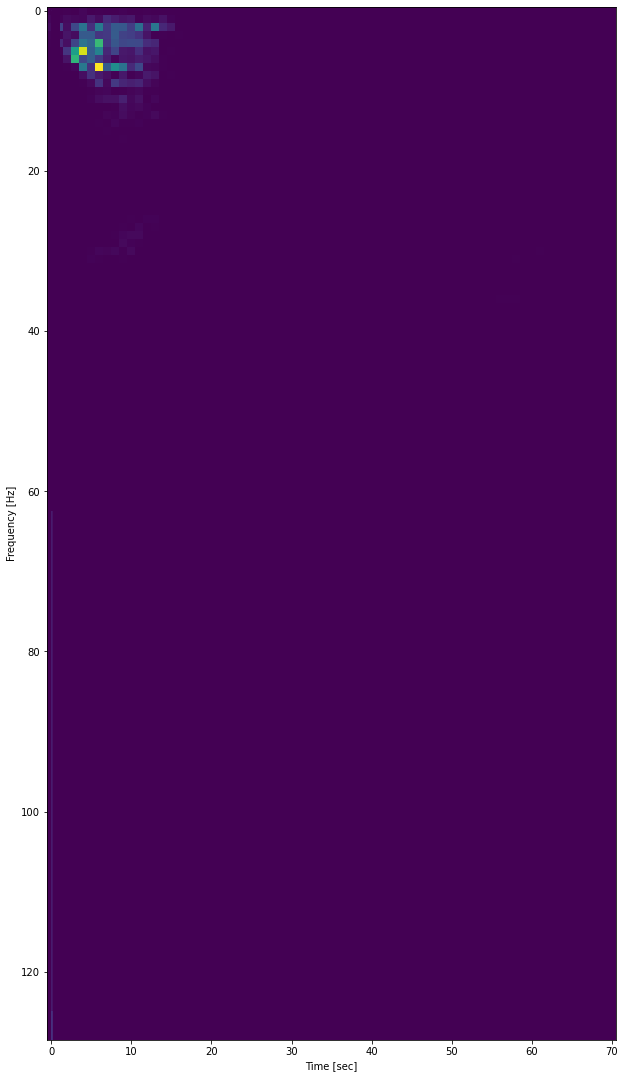

In [75]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,19))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

[0.00000000e+00 1.88499301e-02 3.76998435e-02 ... 3.76998435e-02
 1.88499301e-02 1.07793678e-13]


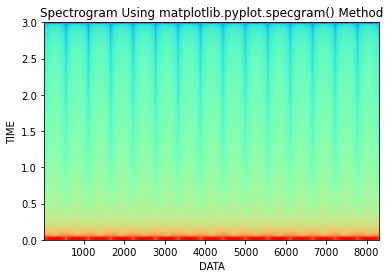

In [79]:
# Importing libraries using import keyword.
import math
import numpy as np
import matplotlib.pyplot as plt

# Set the time difference to take picture of
# the the generated signal.
Time_difference = 0.0001

# Generating an array of values
Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))

# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))

print(Data)
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow")

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()


<ipython-input-77-f3577f5e7cd1>:4: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=2).
  plt.specgram(wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav'), Fs=6, cmap="rainbow")


TypeError: only length-1 arrays can be converted to Python scalars

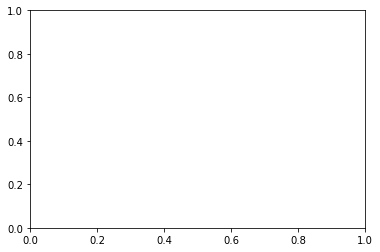

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.specgram(wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav'), Fs=6, cmap="rainbow")
 
# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()

In [72]:
times


array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [73]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [13]:
spectrogram

array([[3.00019264e+00, 2.95396179e+02, 5.75027344e+02, ...,
        1.79564282e-02, 1.45896345e-01, 1.08136326e-01],
       [1.98152087e+03, 1.29215466e+03, 3.45545435e+03, ...,
        2.68431716e-02, 8.66682976e-02, 8.95222574e-02],
       [4.03468701e+03, 2.29850859e+04, 4.63264746e+03, ...,
        1.47732571e-01, 1.38542557e+00, 2.04377007e+00],
       ...,
       [2.17786214e-06, 7.21325159e-06, 9.72227735e-06, ...,
        6.62526872e-05, 3.59796650e-05, 3.57009048e-05],
       [2.56235626e-06, 4.23171005e-05, 9.75406783e-06, ...,
        3.12677876e-04, 1.18152806e-04, 2.74950253e-05],
       [1.65188965e-06, 3.33031221e-06, 1.68632978e-05, ...,
        4.31949911e-06, 1.89926450e-05, 2.40293417e-07]], dtype=float32)

### Load Audio Data

In [14]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            
            # update the data and labels lists, respectively
            if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
                data.append(spectrogram[:128,:48])
                labels.append(d)  # d est nom du dossier
            #else:
             #   print(spectrogram.shape)


down
go
left
no
off
on
right
stop
up
yes


In [63]:
data[0]

array([[3.4946587e-04, 2.1851694e-04, 8.2882143e-05, ..., 2.6568970e+01,
        2.8603546e+02, 2.3799536e+02],
       [2.4631266e-02, 9.7784307e-03, 1.1609027e-02, ..., 5.7106433e+02,
        1.2906905e+02, 7.2216943e+02],
       [3.2373827e-02, 3.5254853e-03, 7.3761251e-03, ..., 3.4563008e+04,
        3.6066930e+04, 1.7653605e+04],
       ...,
       [1.6769261e-05, 1.5220660e-05, 3.0395244e-05, ..., 2.6749960e-05,
        2.3588993e-05, 1.2733555e-06],
       [2.3327733e-05, 2.6257073e-06, 1.3387314e-05, ..., 7.7658715e-06,
        6.7493573e-07, 6.1118672e-06],
       [2.2200644e-05, 1.9091246e-06, 5.3932908e-06, ..., 2.2679484e-05,
        1.1653567e-05, 3.8602493e-06]], dtype=float32)

In [62]:
data.shape

(23455, 128, 48)

In [15]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [16]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [17]:
data = np.array(data)

In [18]:
data.shape

(23455, 128, 48)

### Class distribution

In [19]:
values,count = np.unique(labels,return_counts=True)

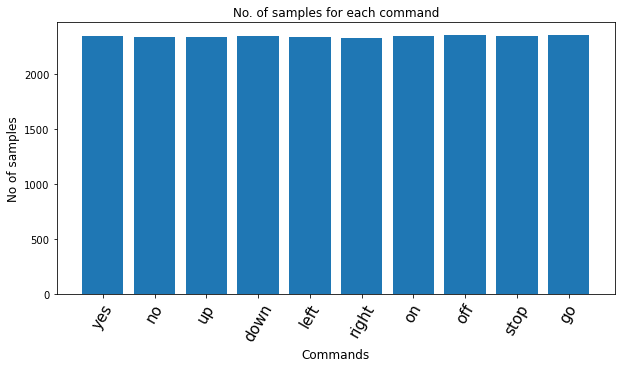

In [20]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [21]:
len(labels)

23455

In [22]:
labels_backup = labels

In [23]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [24]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [25]:
labels_categoricals = to_categorical(ls)

In [26]:
labels_categoricals

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [27]:
labels_categoricals.shape

(23455, 10)

### Data splitting - Train,CV and Test 

In [28]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [29]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (14073, 128, 48)
Cross-Validation data size :  (4691, 128, 48)
Test data size :  (4691, 128, 48)


In [30]:
trainX.shape
testX.shape

(4691, 128, 48)

In [31]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [32]:
trainX.shape
testX.shape

(4691, 128, 48, 1)

In [33]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14073 and each image is of shape : (14073, 128, 48, 1)
Number of cross validation examples : 4691 and each image is of shape : (4691, 128, 48, 1)
Number of testing examples : 4691 and each image is of shape : (4691, 128, 48, 1)


### VGG16 Model

In [38]:
!pip install nvidia-ml-py3 

In [39]:
import tensorflow as tf

In [41]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

RuntimeError: Physical devices cannot be modified after being initialized

In [42]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [7]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 150
batch_size = 32
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D

In [9]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 48, 8)        40        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 24, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 24, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 24, 32)        2

In [54]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [56]:
!nvidia-smi

Mon Jul 18 13:19:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8    11W /  N/A |   4987MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [57]:

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
439/440 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.8890WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 8s 16ms/step - loss: 0.3256 - accuracy: 0.8891 - val_loss: 0.5109 - val_accuracy: 0.8412
Epoch 2/150
437/440 [============================>.] - ETA: 0s - loss: 0.3177 - accuracy: 0.8914WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 15ms/step - loss: 0.3173 - accuracy: 0.8916 - val_loss: 0.4841 - val_accuracy: 0.8610
Epoch 3/150
440/440 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.8918WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 15ms/step - loss: 0.3232 - accuracy: 0.8918 - val_loss: 0.4502 - val_accuracy: 0.8685
Epoch 4/150
439/440 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8922WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3140 - accuracy: 0.8922 - val_loss: 0.4576 - val_accuracy: 0.8629
Epoch 5/150
437/440 [============================>.] - ETA: 0s - loss: 0.3199 - accuracy: 0.8928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3200 - accuracy: 0.8926 - val_loss: 0.4546 - val_accuracy: 0.8599
Epoch 6/150
440/440 [==============================] - ETA: 0s - loss: 0.3096 - accuracy: 0.8948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3096 - accuracy: 0.8948 - val_loss: 0.4340 - val_accuracy: 0.8766
Epoch 7/150
437/440 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8926WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3103 - accuracy: 0.8928 - val_loss: 0.4703 - val_accuracy: 0.8597
Epoch 8/150
437/440 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8952WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3160 - accuracy: 0.8953 - val_loss: 0.4244 - val_accuracy: 0.8732
Epoch 9/150
437/440 [============================>.] - ETA: 0s - loss: 0.3062 - accuracy: 0.8948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3059 - accuracy: 0.8949 - val_loss: 0.4357 - val_accuracy: 0.8678
Epoch 10/150
438/440 [============================>.] - ETA: 0s - loss: 0.3000 - accuracy: 0.8968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2998 - accuracy: 0.8968 - val_loss: 0.4262 - val_accuracy: 0.8727
Epoch 11/150
439/440 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8897WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3193 - accuracy: 0.8894 - val_loss: 0.4713 - val_accuracy: 0.8599
Epoch 12/150
440/440 [==============================] - ETA: 0s - loss: 0.3143 - accuracy: 0.8928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3143 - accuracy: 0.8928 - val_loss: 0.4523 - val_accuracy: 0.8589
Epoch 13/150
440/440 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.8947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3075 - accuracy: 0.8947 - val_loss: 0.4520 - val_accuracy: 0.8604
Epoch 14/150
437/440 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3001 - accuracy: 0.8968 - val_loss: 0.4709 - val_accuracy: 0.8736
Epoch 15/150
440/440 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.9002WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2934 - accuracy: 0.9002 - val_loss: 0.4674 - val_accuracy: 0.8757
Epoch 16/150
437/440 [============================>.] - ETA: 0s - loss: 0.3070 - accuracy: 0.8942WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.3070 - accuracy: 0.8942 - val_loss: 0.4661 - val_accuracy: 0.8751
Epoch 17/150
439/440 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8985WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2947 - accuracy: 0.8985 - val_loss: 0.4622 - val_accuracy: 0.8723
Epoch 18/150
439/440 [============================>.] - ETA: 0s - loss: 0.2876 - accuracy: 0.8984WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2875 - accuracy: 0.8985 - val_loss: 0.4701 - val_accuracy: 0.8806
Epoch 19/150
439/440 [============================>.] - ETA: 0s - loss: 0.2912 - accuracy: 0.9038WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2914 - accuracy: 0.9039 - val_loss: 0.4605 - val_accuracy: 0.8804
Epoch 20/150
437/440 [============================>.] - ETA: 0s - loss: 0.2903 - accuracy: 0.9020WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2893 - accuracy: 0.9024 - val_loss: 0.5184 - val_accuracy: 0.8749
Epoch 21/150
437/440 [============================>.] - ETA: 0s - loss: 0.2915 - accuracy: 0.9020WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2916 - accuracy: 0.9017 - val_loss: 0.4594 - val_accuracy: 0.8670
Epoch 22/150
439/440 [============================>.] - ETA: 0s - loss: 0.2836 - accuracy: 0.9025WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2836 - accuracy: 0.9025 - val_loss: 0.4384 - val_accuracy: 0.8757
Epoch 23/150
437/440 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.9020WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2817 - accuracy: 0.9024 - val_loss: 0.4987 - val_accuracy: 0.8499
Epoch 24/150
440/440 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.9022WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2878 - accuracy: 0.9022 - val_loss: 0.4858 - val_accuracy: 0.8604
Epoch 25/150
439/440 [============================>.] - ETA: 0s - loss: 0.2900 - accuracy: 0.9000WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2898 - accuracy: 0.9000 - val_loss: 0.4340 - val_accuracy: 0.8744
Epoch 26/150
437/440 [============================>.] - ETA: 0s - loss: 0.2854 - accuracy: 0.9051WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2853 - accuracy: 0.9051 - val_loss: 0.4676 - val_accuracy: 0.8685
Epoch 27/150
437/440 [============================>.] - ETA: 0s - loss: 0.2935 - accuracy: 0.8995WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2944 - accuracy: 0.8995 - val_loss: 0.4297 - val_accuracy: 0.8704
Epoch 28/150
440/440 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.9061WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2732 - accuracy: 0.9061 - val_loss: 0.4284 - val_accuracy: 0.8755
Epoch 29/150
440/440 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.9040WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2741 - accuracy: 0.9040 - val_loss: 0.4376 - val_accuracy: 0.8800
Epoch 30/150
439/440 [============================>.] - ETA: 0s - loss: 0.2745 - accuracy: 0.9045WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2745 - accuracy: 0.9046 - val_loss: 0.4393 - val_accuracy: 0.8740
Epoch 31/150
438/440 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.9007WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2997 - accuracy: 0.9008 - val_loss: 0.4518 - val_accuracy: 0.8708
Epoch 32/150
439/440 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.9067WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2764 - accuracy: 0.9068 - val_loss: 0.4423 - val_accuracy: 0.8787
Epoch 33/150
437/440 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.9039WARNING:tensorflow:Can save best model only with val_acc available, skipping.


440/440 [==============================] - 7s 16ms/step - loss: 0.2809 - accuracy: 0.9039 - val_loss: 0.4526 - val_accuracy: 0.8678
Epoch 33: early stopping


In [65]:
model.save("C:/Users/Tuf F15/Desktop/DATASET/m")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/m\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/m\assets


ValueError: x and y must have same first dimension, but have shapes (150,) and (143,)

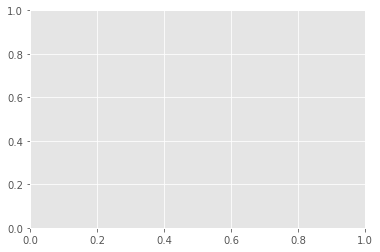

In [52]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

ValueError: x and y must have same first dimension, but have shapes (150,) and (143,)

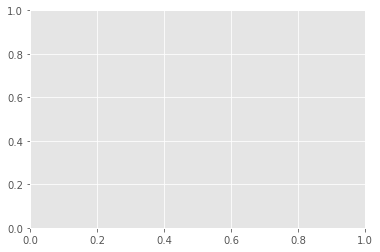

In [53]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [58]:
best_acc = max(history.history["val_accuracy"])

In [59]:
best_acc*100

88.06224465370178

In [60]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)

147/147 [==============================] - 1s 4ms/step


In [61]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [62]:
def plot_Confusion_Matrix(actual_labels,predict_labels,title):
    """This function plot the confusion matrix"""
    # Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cm = confusion_matrix(actual_labels, predict_labels)
    classNames = words
    cm_data = pd.DataFrame(cm,index = classNames,
                  columns = classNames)
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_data, annot=True,fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


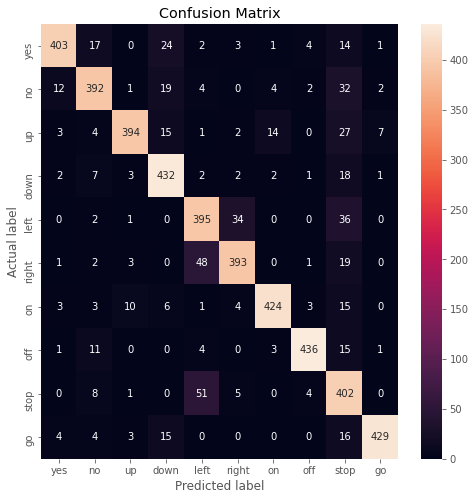

In [63]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot_Confusion_Matrix(testY.argmax(axis=1), predIdxs,"Confusion Matrix")

## Results

In [64]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Results "
ptable.field_names = ["Mode",'Sample size','Accuracy']
ptable.add_row(["Train","14073","89.03"])
ptable.add_row(["Cross-Validation","4691","85.41"])
ptable.add_row(["Test","4691","85.44"])
print(ptable)

+-------------------------------------------+
|               Model Results               |
+------------------+-------------+----------+
|       Mode       | Sample size | Accuracy |
+------------------+-------------+----------+
|      Train       |    14073    |  89.03   |
| Cross-Validation |     4691    |  85.41   |
|       Test       |     4691    |  85.44   |
+------------------+-------------+----------+


In [34]:


from tensorflow import keras
model = keras.models.load_model('C:/Users/Tuf F15/Desktop/DATASET/m')

In [35]:
result = model.evaluate(testX, testY)

147/147 [==============================] - 21s 24ms/step - loss: 0.4059 - accuracy: 0.8740


In [36]:
print("test loss, test acc:", result)


test loss, test acc: [0.4058622121810913, 0.8740140795707703]


In [37]:
pre=model.predict(testX)

147/147 [==============================] - 2s 12ms/step


In [38]:
testX.shape

(4691, 128, 48, 1)

In [39]:
import numpy as np

In [40]:
np.array(testX[0])

array([[[1.6439131e-02],
        [3.2036058e-03],
        [6.9001107e-06],
        ...,
        [1.7382833e-03],
        [1.8181238e-02],
        [7.9538431e-03]],

       [[2.2333496e+00],
        [2.6495774e+00],
        [7.1895704e+00],
        ...,
        [3.9924498e+00],
        [2.6459497e-01],
        [1.9882274e+00]],

       [[4.7733927e-01],
        [1.3411906e-01],
        [2.7221930e-01],
        ...,
        [6.4661765e-01],
        [6.5869182e-01],
        [3.8515028e-01]],

       ...,

       [[1.4618429e-06],
        [4.8097831e-06],
        [2.6808753e-05],
        ...,
        [2.9357649e-02],
        [1.0315610e-02],
        [1.6610391e-02]],

       [[1.5460306e-05],
        [1.0372002e-05],
        [2.9436571e-06],
        ...,
        [3.0490654e-03],
        [1.0702660e-02],
        [7.6590809e-03]],

       [[9.1252768e-06],
        [1.7467220e-05],
        [5.0652384e-06],
        ...,
        [2.2076201e-03],
        [3.4327505e-03],
        [2.2547960e-03]]

### TEST

In [41]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\test\test'

dataT = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    #file = audios[i]
    sample_rate, samples = wavfile.read(os.path.join(audios_dir,d))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    # convert the image data to NumPy arrays while scaling the pixel
    # intensities to the range [0, 255]
    #image = np.array(image)/255.0
    
    # update the data and labels lists, respectively
    if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
        dataT.append(spectrogram[:128,:48])
    #else:
        #   print(spectrogram.shape)

c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [42]:
dataT = np.array(dataT)

In [43]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataT = dataT.reshape(dataT.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataT = dataT.reshape(dataT.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [44]:
dataT.shape

(4690, 128, 48, 1)

In [45]:
pre=model.predict(dataT)

147/147 [==============================] - 2s 15ms/step


In [46]:
pre.shape

(4690, 10)

In [47]:
pre[0]

array([2.9752339e-04, 1.0840432e-03, 1.6671187e-03, 2.6360370e-04,
       4.9087014e-03, 1.0133242e-03, 8.7719999e-04, 1.4864685e-03,
       9.8769987e-01, 7.0213788e-04], dtype=float32)

In [48]:
np.argmax(pre[0])

8

In [49]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [50]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_00fe78fd9.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)


In [51]:
dataS.shape

(1, 128, 48, 1)

In [52]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 259ms/step


In [64]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [53]:
label_annot[np.argmax(pre[0])] 

'stop'

In [54]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a42cce82.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [55]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [65]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [56]:
label_annot[np.argmax(pre[0])] 

'down'

In [57]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a53a9972.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [58]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [66]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [59]:
label_annot[np.argmax(pre[0])] 

'yes'

In [119]:
import librosa

In [128]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\Record.wav")

frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

sample_rate


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


16000

In [80]:
import IPython


In [100]:
IPython.display.Audio(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\saad.wav")

In [153]:
#samples, sample_rate = librosa.load(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\Record.wav")
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a53a9972.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)




In [155]:
dataS.shape

(1, 128, 48)

In [150]:
#samples, sample_rate = librosa.load(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\Record.wav")
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\Record.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: cannot reshape array of size 256 into shape (1,128,48,1)

In [156]:
dataS.shape

(1, 128, 48)

In [108]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 21ms/step


In [109]:
label_annot[np.argmax(pre)]

'up'

### Preprocessing Audio